In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt 
import os 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\msyeu\Hate Crime Analysis'

In [4]:
#Import Data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'hate_crimes_wrangled.csv'))

# 2. Data Cleaning

In [5]:
df.head()

,Unnamed: 0,DATA_YEAR,STATE_ABBR,STATE_NAME,REGION_NAME,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,BIAS_DESC
0,0,1991,AR,Arkansas,South,1,White,1,Intimidation,1.0,Anti-Black or African American
1,1,1991,AR,Arkansas,South,1,Black or African American,1,Simple Assault,1.0,Anti-White
2,2,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1.0,Anti-Black or African American
3,3,1991,AR,Arkansas,South,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Anti-White
4,4,1991,AR,Arkansas,South,1,Black or African American,1,Aggravated Assault,1.0,Anti-White


In [6]:
df.shape

(180293, 11)

In [7]:
#Check for missing values
df.isnull().sum()

Unnamed: 0                  0
DATA_YEAR                   0
STATE_ABBR                  0
STATE_NAME                  0
REGION_NAME                 0
TOTAL_OFFENDER_COUNT        0
OFFENDER_RACE               0
VICTIM_COUNT                0
OFFENSE_NAME                0
TOTAL_INDIVIDUAL_VICTIMS    0
BIAS_DESC                   0
dtype: int64

In [8]:
#Check for duplicates
dups = df.duplicated()

In [9]:
dups.shape

(180293,)

In [10]:
df.columns

Index(['Unnamed: 0', 'DATA_YEAR', 'STATE_ABBR', 'STATE_NAME', 'REGION_NAME',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'VICTIM_COUNT', 'OFFENSE_NAME',
       'TOTAL_INDIVIDUAL_VICTIMS', 'BIAS_DESC'],
      dtype='object')

In [12]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [13]:
df.columns

Index(['incident_year', 'state_abbr', 'state_name', 'region_name',
       'offender_count', 'offender_race', 'victim_count', 'offense_type',
       'total_individual_victims', 'prejudice'],
      dtype='object')

In [14]:
# Renaming columns 
new_names = {'DATA_YEAR':'incident_year',
             'STATE_ABBR':'state_abbr',
             'STATE_NAME':'state_name',
             'REGION_NAME':'region_name',
             'TOTAL_OFFENDER_COUNT':'offender_count',
             'OFFENDER_RACE':'offender_race',
             'VICTIM_COUNT':'victim_count',
             'OFFENSE_NAME':'offense_type',
             'TOTAL_INDIVIDUAL_VICTIMS':'total_individual_victims',
             'BIAS_DESC':'prejudice'}

df.rename(columns=new_names,inplace=True)

C:\Users\msyeu\AppData\Local\Temp\ipykernel_19108\4040426630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_individual_victims'],bins = 25, kde = True)
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_individual_victims', ylabel='Density'>

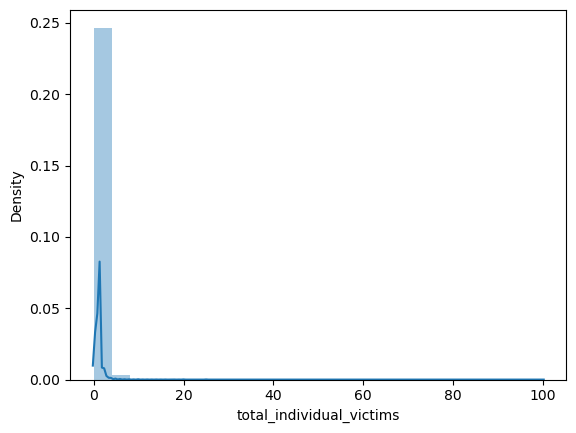

In [15]:
# Check for extreme values
sns.distplot(df['total_individual_victims'],bins = 25, kde = True)

In [16]:
#check for mean
df['total_individual_victims'].mean()

0.9897278319180445

In [17]:
#Check for median
df['total_individual_victims'].median()

1.0

In [19]:
#check for min
df['total_individual_victims'].min()

0.0

In [20]:
#check for max
df['total_individual_victims'].max()

100.0

In [21]:
df.describe()

,incident_year,offender_count,victim_count,total_individual_victims
count,180293.000000,180293.000000,180293.000000,180293.000000
mean,2003.843067,0.993860,1.243043,0.989728
std,7.682728,1.412837,1.009580,1.022176
min,1991.000000,0.000000,1.000000,0.000000
25%,1997.000000,0.000000,1.000000,1.000000
50%,2003.000000,1.000000,1.000000,1.000000
75%,2010.000000,1.000000,1.000000,1.000000
max,2018.000000,99.000000,100.000000,100.000000


# 3. Data Prep for Regression Analysis

Hypothesis: If the total individual victims count increases, then the victim count increases. 

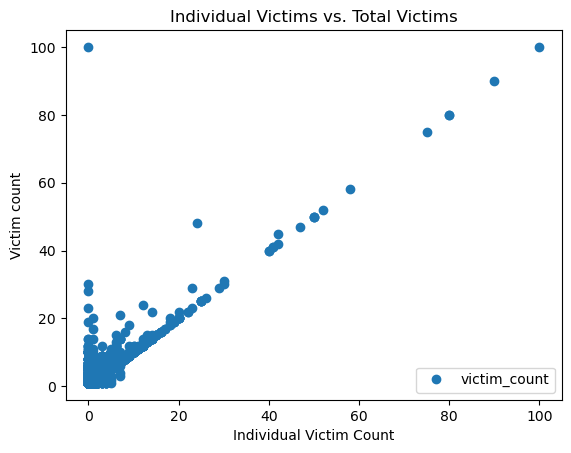

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'total_individual_victims', y='victim_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Individual Victims vs. Total Victims')  
plt.xlabel('Individual Victim Count')  
plt.ylabel('Victim count')  
plt.show()

In [23]:
#Reshape the variables into NumPy arrays and put them into separate objects. 
x = df['total_individual_victims'].values.reshape(-1,1)
y = df['victim_count'].values.reshape(-1,1)

In [24]:
x

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [25]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [27]:
#Split data into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# 4. Regression Analysis

In [28]:
#Create regression object
regression = LinearRegression()

In [29]:
#Fit the regression to the training set of each variable. This trains the model. 
regression.fit(x_train, y_train)

LinearRegression()

In [30]:
#Apply model to x_test data to predict y values
y_predicted = regression.predict(x_test)

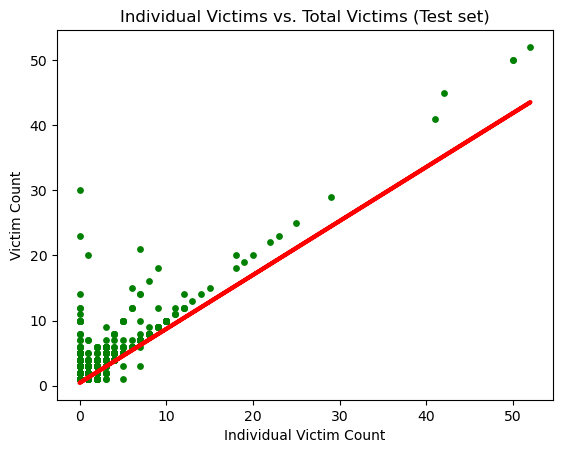

In [32]:
#Create a plot that shows the regression line from the model on the test set. 
plot_test = plt
plot_test.scatter(x_test, y_test, color='green', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Individual Victims vs. Total Victims (Test set)')
plot_test.xlabel('Individual Victim Count')
plot_test.ylabel('Victim Count')
plot_test.show()

In [36]:
#Create objects that contain the model summary statistics. 

rmse = mean_squared_error(y_test, y_predicted) #This is the mean squared error
r2 = r2_score(y_test, y_predicted) #This the r-squared value also known as R2 score

In [37]:
#Print the model summary statistics. This is where you evaluate the performance of the model. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.82890271]]
Mean squared error:  0.279603202785011
R2 score:  0.6540993570421774


# Intepretation:

The positive slope confirms a positive relationship, supporting my hypothesis that as the count of individual victims increases, so does the victim count. The MSE (mean squared error) of approximately 0.28 indicates a small deviation of the regression line from the observations, indicating a good fit. Additionally, an R-squared score of around 0.65 suggests a reasonable level of explanation for the variability in the data.

In [38]:
#Predict on the training set
#This is predicting x_train. 
y_predicted_train = regression.predict(x_train)

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.82890271]]
Mean squared error:  0.34180400268475425
R2 score:  0.6919644035679235


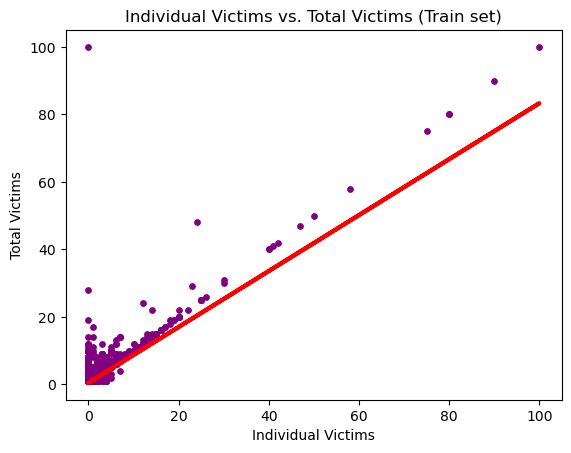

In [41]:
plot_test = plt
plot_test.scatter(x_train, y_train, color='purple', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Individual Victims vs. Total Victims (Train set)')
plot_test.xlabel('Individual Victims')
plot_test.ylabel('Total Victims')
plot_test.show()

In [42]:
#Create a dataframe comparing the actual and predicted values of y. 

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,1.251727
1,1,1.251727
2,1,1.251727
3,1,1.251727
4,1,1.251727
5,1,1.251727
6,1,1.251727
7,2,2.080629
8,1,1.251727
9,1,1.251727


The models outcome on the training set is very similar to that on the test set. Same slope, but slightly higher MSE and R2 score. 

In [43]:
#exporting data
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'new_hate_crime_wrangled.csv'))